In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import random

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/UTS SISCER.csv")

# Randomly sample 50,000 rows from the DataFrame
sampled_df = df.sample(n=100000, random_state=random.seed(42))

# Save the sampled dataset to a new CSV file
sampled_df.to_csv("/content/drive/MyDrive/diabetes_dataset.csv", index=False)

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/diabetes_dataset.csv")

In [ ]:
data.shape

(100000, 18)

In [ ]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:

data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# Def X and Y
x = data.drop('Diabetes_binary', 1)
y = data['Diabetes_binary']

<ipython-input-10-47560f0a7a34>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = data.drop('Diabetes_binary', 1)


In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,0,0,1,26,0,0,0,0,0,1,0,9,0,0,5,6,6
1,0,1,1,1,27,0,0,1,1,1,1,0,15,8,0,7,3,1
2,1,1,1,1,27,0,0,1,1,1,1,0,5,30,0,9,6,7
3,0,1,1,1,30,1,1,1,1,0,1,0,0,3,0,10,5,3
4,1,0,0,1,25,1,0,0,1,0,0,0,0,0,0,9,5,5


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

2500/2500 - 25s - loss: 0.3416 - accuracy: 0.8601 - 25s/epoch - 10ms/step
epoch[1|100], Loss:0.34159043431282043,accuracy:0.8601499795913696
2500/2500 - 12s - loss: 0.3312 - accuracy: 0.8621 - 12s/epoch - 5ms/step
epoch[2|100], Loss:0.3312021791934967,accuracy:0.8621249794960022
2500/2500 - 11s - loss: 0.3302 - accuracy: 0.8617 - 11s/epoch - 5ms/step
epoch[3|100], Loss:0.3302251696586609,accuracy:0.8616750240325928
2500/2500 - 12s - loss: 0.3295 - accuracy: 0.8621 - 12s/epoch - 5ms/step
epoch[4|100], Loss:0.32947733998298645,accuracy:0.8621125221252441
2500/2500 - 12s - loss: 0.3287 - accuracy: 0.8628 - 12s/epoch - 5ms/step
epoch[5|100], Loss:0.32870200276374817,accuracy:0.8628249764442444
2500/2500 - 12s - loss: 0.3281 - accuracy: 0.8626 - 12s/epoch - 5ms/step
epoch[6|100], Loss:0.32811614871025085,accuracy:0.8625624775886536
2500/2500 - 11s - loss: 0.3276 - accuracy: 0.8624 - 11s/epoch - 5ms/step
epoch[7|100], Loss:0.3275569677352905,accuracy:0.8624250292778015
2500/2500 - 11s - loss

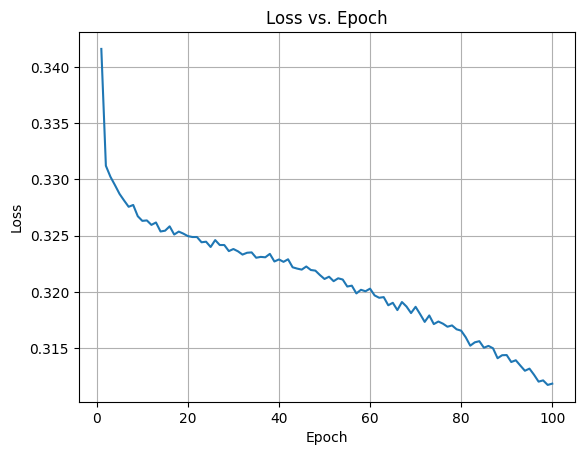

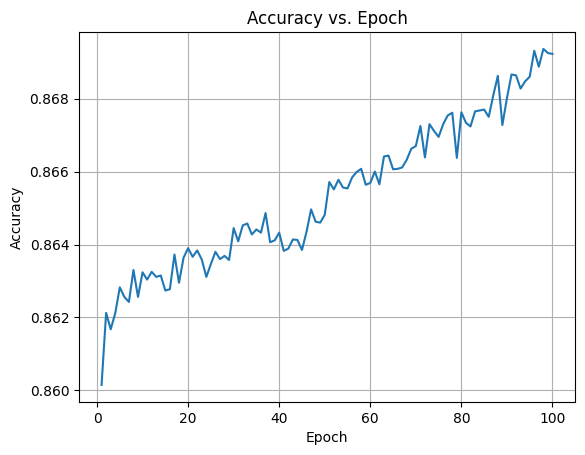

625/625 [==============================] - 2s 2ms/step


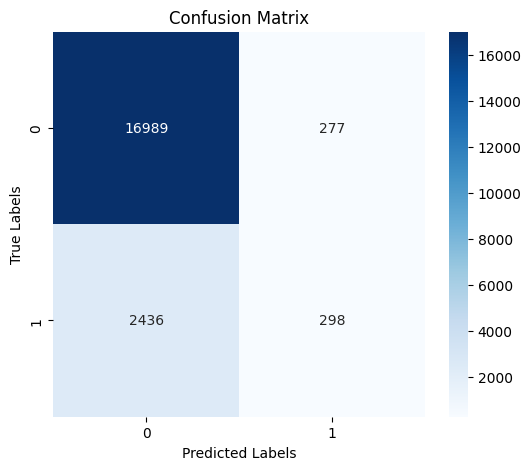

Test Loss: 0.32693907618522644
Test Accuracy: 0.8643500208854675
F1-score: 0.18011483831973407
Sensitivity: 0.10899780541331383
Specificity: 0.9839569095331866
Precision: 0.5182608695652174


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Normalize the input features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM network
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Lists to store loss and accuracy values during training
losses = []
accuracies = []

# Train the LSTM model and store the training metrics
epochs= 100
batch_size = 32
for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, verbose=2)
    loss = history.history['loss'][0]
    accuracy = history.history['accuracy'][0]
    losses.append(loss)
    accuracies.append(accuracy)
    print(f"epoch[{epoch+1}|{epochs}], Loss:{loss},accuracy:{accuracy}")


# Plot the loss vs. epochs graph
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()

# Plot the accuracy vs. epochs graph
plt.plot(range(1, epochs + 1), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.grid(True)
plt.show()

# evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predicting on the test set
y_pred_prob = model.predict(X_test)
threshold = 0.5  # choose your threshold here
y_pred = np.where(y_pred_prob > threshold, 1, 0)
y_pred = np.squeeze(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# calculate f1-score, sensitivity, and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
specificity = tn / (tn + fp)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
print("F1-score:", f1)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)



In [ ]:
# this fucntion calculates different evaluation parameters of a model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,mean_absolute_error,mean_squared_error
def evaluate_model(y_true,y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)
  auc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc)
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.show()

In [ ]:
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
3582,0,0,1,20,1,0,0,0,1,1,0,2,5,0,5,6,8
60498,0,1,1,37,1,0,0,0,0,1,0,0,10,0,8,4,7
53227,0,0,1,22,0,0,0,0,1,1,0,0,10,0,10,6,7
21333,0,0,1,27,0,0,0,1,1,1,0,0,0,0,8,6,8
3885,0,1,1,24,1,1,1,1,1,1,0,0,0,1,10,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60116,1,1,1,28,0,0,1,1,0,1,0,0,3,1,11,6,7
2415,1,0,1,31,1,0,0,0,0,0,0,0,0,1,8,5,7
43763,0,0,1,19,1,0,0,0,0,1,0,10,30,0,3,4,2
71345,0,0,1,23,0,0,0,1,1,1,0,0,0,0,11,6,8


In [ ]:
y_test

3582     0
60498    1
53227    0
21333    0
3885     0
        ..
60116    1
2415     0
43763    0
71345    0
77687    0
Name: Diabetes_binary, Length: 20000, dtype: int64

**Decision Tree**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np


# Define the hyperparameters to tune and their possible values
param_grid = {
    'max_depth': np.arange(2, 10, 2),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': [None, 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'splitter':['best','random']
}


# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)



Best hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy score:  0.8655375


In [ ]:
# Creating a classifier object
clf = DecisionTreeClassifier(class_weight='balanced',
                                      criterion='gini',
                                      max_depth=6,
                                      max_features=None,
                                      min_samples_leaf=1,
                                      min_samples_split=2,
                                      splitter='best')
# Training
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6)

In [ ]:
y_pred=clf.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 1 0 ... 0 0 0]


In [ ]:
print(y_test.shape)

(20000,)


Accuracy: 0.68465
Precision: 0.2678454485920105
Recall: 0.7404055032585083
F1 Score: 0.3933827065499664
AUC-ROC: 0.7080609718404156
Mean Absolute Error: 0.31535
Root Mean Squared Error: 0.5615603262339676


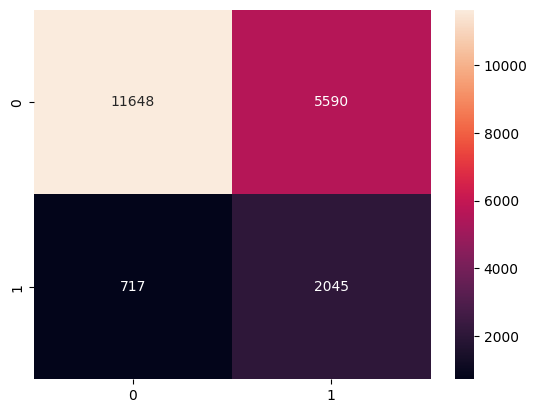

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,mean_absolute_error,mean_squared_error
evaluate_model(y_test, y_pred)

In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 17  # replace with the number of features in your data
string = '''	1	1	0	25	1	0	1	0	1	1	0	8	0	0	9	3	2'''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 17)

# Make predictions using the trained model
predictions = clf.predict(input_data_reshaped)

print(predictions)

17
[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(clf, 'dia_dec.pkl')

['dia_dec.pkl']

In [ ]:
import joblib
joblib.load('dia_dec.pkl')

DecisionTreeClassifier(class_weight='balanced', max_depth=6)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Create a Random Forest classifier
rfc = RandomForestClassifier()

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=100)
model.fit(X_train, y_train)
rcf_predictions = model.predict(X_test)

In [ ]:
y_pred=model.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 0 0 ... 0 0 0]


Accuracy: 0.864
Precision: 0.5564516129032258
Recall: 0.07494569152787835
F1 Score: 0.13209955328653478
AUC-ROC: 0.5326869077200826
Mean Absolute Error: 0.136
Root Mean Squared Error: 0.3687817782917155


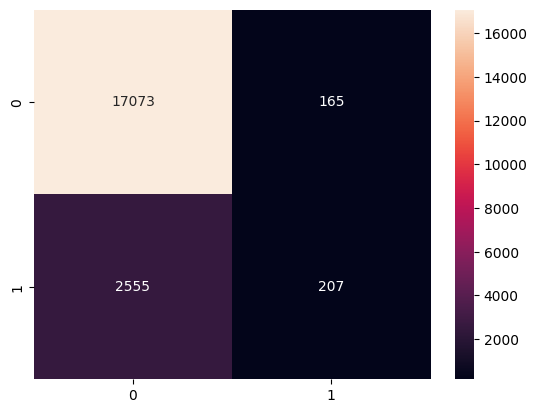

In [ ]:
evaluate_model(y_test,rcf_predictions)

In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 17  # replace with the number of features in your data
string = '''1	1	1	35	1	0	0	0	0	1	0	0	0	1	7	4	5'''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 17)

# Make predictions using the trained model
predictions = model.predict(input_data_reshaped)

print(predictions)

17
[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(model, 'dia_ran.pkl')

['dia_ran.pkl']

**Logistic Regression using penalty as Elasticnet**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
#ElasticNet
param_grid = [    {'penalty': ['elasticnet'],
     'solver': ['saga'],
     'l1_ratio': [0.1, 0.5, 0.9],
     'C': [100, 1, 10]}
]
logreg = LogisticRegression()
# Perform grid search with crss-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1,)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='elasticnet', C=1, solver='saga', l1_ratio=0.5)
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.86285
Precision: 0.5143288084464555
Recall: 0.12346125995655322
F1 Score: 0.19912408759124084
AUC-ROC: 0.5523907993714776
Mean Absolute Error: 0.13715
Root Mean Squared Error: 0.3703376837428241


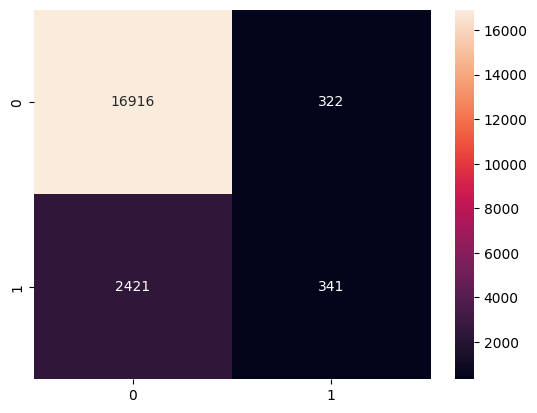

In [ ]:
evaluate_model(y_test,predictions)

In [ ]:
y_pred=logreg.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 0 0 ... 0 0 0]


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 17  # replace with the number of features in your data
string = '''1	1	1	35	1	0	0	0	0	1	0	0	0	1	7	4	5'''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 17)

# Make predictions using the trained model
predictions = logreg.predict(input_data_reshaped)

print(predictions)

17
[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(logreg, 'dia_log_elastic.pkl')

['dia_log_elastic.pkl']

**Logistic Regression using penalty as l2**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
#l1
param_grid = [    {'penalty': ['l2'],
     'solver': ['lbfgs','saga','liblinear','newton-cg','newton-cholesky','sag'],
     'l1_ratio': [0.1, 0.5, 0.9],
     'C': [0.1, 1, 10]}
]

# Perform grid search with crss-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1,)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear', l1_ratio=0.1)
logreg1.fit(X_train, y_train)
predictions = logreg1.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [ ]:
y_pred=logreg1.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 0 0 ... 0 0 0]


Accuracy: 0.8629
Precision: 0.5153374233128835
Recall: 0.1216509775524982
F1 Score: 0.19683655536028122
AUC-ROC: 0.5516596922801358
Mean Absolute Error: 0.1371
Root Mean Squared Error: 0.37027017163147236


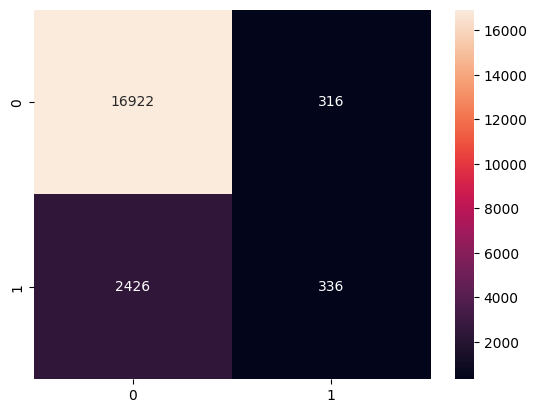

In [ ]:
evaluate_model(y_test,predictions)

In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 17  # replace with the number of features in your data
string = '''1	1	1	25	1	0	0	1	0	1	0	3	0	1	11	5	5'''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 17)

# Make predictions using the trained model
predictions = logreg1.predict(input_data_reshaped)

print(predictions)

17
[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(logreg1, 'dia_log_l2.pkl')

['dia_log_l2.pkl']

**Logistic Regression using penalty as l1**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
#l1
param_grid = [    {'penalty': ['l1'],
     'solver': ['liblinear','saga'],
     'l1_ratio': [0.1, 0.5, 0.9],
     'C': [0.1, 1, 10]}
]

# Perform grid search with crss-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1,)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', l1_ratio=0.1)
logreg2.fit(X_train, y_train)
predictions = logreg2.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
y_pred=logreg2.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 0 0 ... 0 0 0]


Accuracy: 0.86295
Precision: 0.5159817351598174
Recall: 0.12273714699493121
F1 Score: 0.19830359754314125
AUC-ROC: 0.5521447656311238
Mean Absolute Error: 0.13705
Root Mean Squared Error: 0.3702026472082554


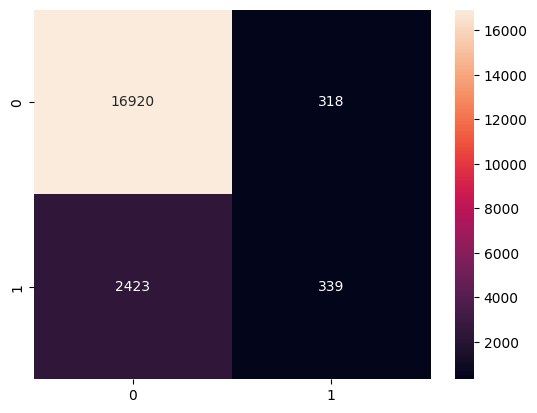

In [ ]:
evaluate_model(y_test,predictions)

In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 17  # replace with the number of features in your data
string = '''1	1	1	25	1	0	0	1	0	1	0	3	0	1	11	5	5'''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 17)

# Make predictions using the trained model
predictions = logreg2.predict(input_data_reshaped)

print(predictions)

17
[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(logreg2, 'dia_log_l1.pkl')

['dia_log_l1.pkl']

**KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
import numpy as np

param_grid = {'n_neighbors' : np.arange(1,316)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 3,scoring = 'accuracy')
grid.fit(X_train,y_train)
print('Best parameter: ', grid.best_params_)
print('Best score: ', grid.best_score_)


Best parameter:  {'n_neighbors': 46}
Best score:  0.8613625013629429


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=46)
knn1.fit(X_train,y_train)
predictions = knn1.predict(X_test)

Accuracy: 0.86265
Precision: 0.5311203319502075
Recall: 0.04634322954380883
F1 Score: 0.08524808524808523
AUC-ROC: 0.5198939723539905
Mean Absolute Error: 0.13735
Root Mean Squared Error: 0.37060760920412844


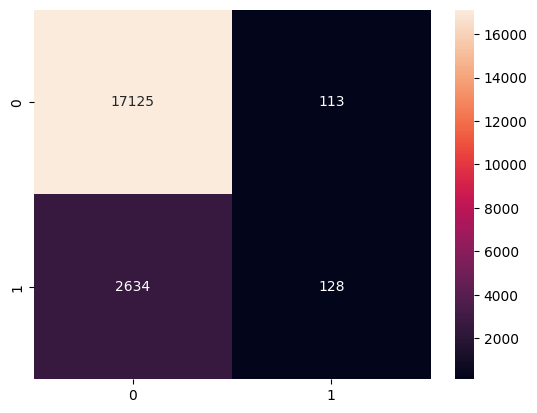

In [ ]:
evaluate_model(y_test,predictions)

In [ ]:
y_pred=knn1.predict(X_test)
print("Predicted values:",y_pred)

Predicted values: [0 0 0 ... 0 0 0]


In [ ]:
import numpy as np

# Assuming your training data has shape (n_samples, n_features)
n_features = 17  # replace with the number of features in your data
string = '''1	1	1	25	1	0	0	1	0	1	0	3	0	1	11	5	5'''
print(len(list(map(int, string.split()))))
input_data = np.array(list(map(int, string.split())))
input_data_reshaped = input_data.reshape(1, 17)

# Make predictions using the trained model
predictions = knn1.predict(input_data_reshaped)

print(predictions)

17
[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#saving the model
import joblib
joblib.dump(knn1, 'dia_knn.pkl')

['dia_knn.pkl']

In [ ]:
import joblib
joblib.load('/content/drive/MyDrive/dia_knn.pkl')

KNeighborsClassifier(n_neighbors=46)